<h1>Inverse problem</h1>


I expose here how to solve the inverse probleme of reconstructiong $\alpha,\ \beta,\ a$ and $b$ from of finite number of the $u$ solution's values.
The first step is to define a grid to work with and to extract a sample of it, which will be the base for the observation set.

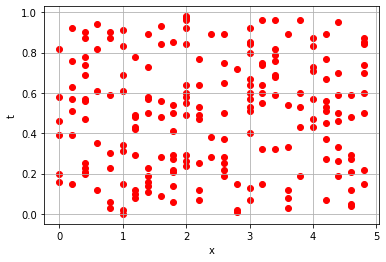

In [1]:
from direct_problem import Grid

grid = Grid(
    x_min=0,
    x_max=5,
    delta_x=0.2,
    t_max=1,
    delta_t=0.01
)


from data import Coordinates

sample_size=200
coordinates = Coordinates(grid)
sample = coordinates.get_random_coordinates(sample_size=sample_size)

def plot_sample():
    pass


import matplotlib.pyplot as plt

def show(sample):
    plt.scatter(*sample, c='r')
    plt.grid()
    plt.xlabel("x")
    plt.ylabel("t")

show(sample)

The next step is to generate a set of random parameters. Each subset $\alpha_i,\ \beta_i,\ a_i$ and $b_i$ will be used to defined and solve a direct problem. 

Each solution, along with those parameters will be used to train a neural network whose objectif is to map solution's values to the parameters.

In [2]:
from data import RandomParameters

parameters_size = 150 # This will also be the numbers of direct 
                      # problems to solve in order to generate the data.

parameters = RandomParameters(parameters_size=parameters_size)

print(parameters)

      alpha      beta         a         b
0  0.438765  0.102908  2.106078  0.215279
1  0.051405  0.844185  1.212911  0.449405
2  0.193712  0.984241  0.459932  1.127769
3  0.467384  0.531809  2.646033  1.700094
4  0.965460  0.199044  2.563128  1.674375


In [3]:
import numpy as np

from data import DataGenerator


f = lambda x: np.maximum(2-x, 0)

data_generator = DataGenerator(coordinates, parameters, f)

# We build the DataLoader that will be used by pytorch

batch_size = sample_size // 10
train_dl, test_dl = data_generator.dataloader(batch_size=batch_size)

We are now ready to train the model.

Average validation loss before fit: 1.4284045696258545
Average validation loss: 0.3348337709903717


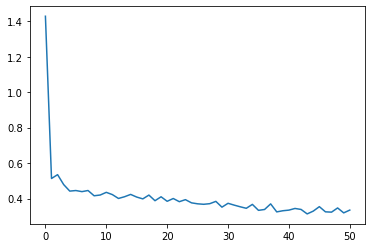

In [14]:
from inverse_problem import get_optimized_model, fit

model, opt = get_optimized_model(sample_size, learning_rate=0.005)

epochs = 50

loss_array = fit(model, train_dl, test_dl, epochs, opt) # Also return the average validation loss at 
                                                        # each step of the training

plt.plot(loss_array)